# Cost Function

In [81]:
import numpy as np
%matplotlib widget
from matplotlib import cm
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')
from copy import deepcopy, copy

In [82]:
X_train = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [
                   3, 0.5], [2, 2], [1, 2.5]])  # (m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

In [83]:
i_0 = y_train == 0
i_1 = y_train == 1
i_0 = i_0.reshape(-1,)
i_1 = i_1.reshape(-1,)

In [84]:
X_train

array([[0.5, 1.5],
       [1. , 1. ],
       [1.5, 0.5],
       [3. , 0.5],
       [2. , 2. ],
       [1. , 2.5]])

[0.5 1.  1.5] [1.5 1.  0.5]
[3. 2. 1.] [0.5 2.  2.5]


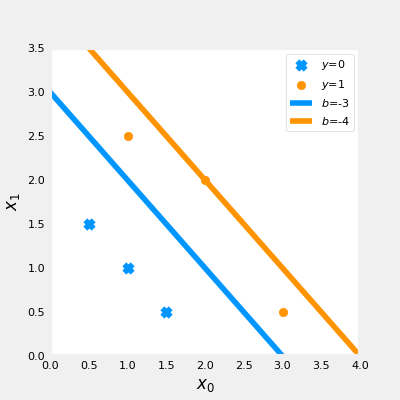

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

print(X_train[i_0, 0], X_train[i_0, 1])
print(X_train[i_1, 0], X_train[i_1, 1])

# points
ax.scatter(X_train[i_0, 0], X_train[i_0, 1], marker='x', label="$y$=0")
ax.scatter(X_train[i_1, 0], X_train[i_1, 1], marker='o', label="$y$=1")

# line
# w1x1 + w0x0 + b = 0
# b = -3, -4
x0 = np.arange(0, 6)
x11 = 3 - x0
x12 = 4 - x0
ax.plot(x0, x11, label="$b$=-3")
ax.plot(x0, x12, label="$b$=-4")

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.show()

In [86]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1.0/(1.0+np.exp(-z))
    return g

In [87]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f = sigmoid(z)
    cost = y*np.log(f) + (1 - y)*np.log(1 - f)
    cost = np.sum(cost)/m
    return cost

In [88]:
w_tmp = np.array([1, 1])
b_tmp = -3

In [89]:
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

-0.36686678640551745


## Reg

In [90]:
import numpy as np


def compute_gradient_logistic(X, y, w, b):
    m = X.shape[0]

    f_w_b = sigmoid(np.dot(X, w) + b)
    e = f_w_b - y
    dj_dw = X.T @ e
    dj_dw = dj_dw / m
    dj_db = np.sum(e) / m
    return dj_db, dj_dw

In [91]:
X_tmp = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2., 3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}")
print(f"dj_dw: {dj_dw_tmp.tolist()}")

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [92]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):

    J_history = []
    w = deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion
            J_history.append(compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % np.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history  # return final w,b and J history for graphing

In [93]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost -0.684610468560574   
Iteration 1000: Cost -0.1590977666870456   
Iteration 2000: Cost -0.08460064176930084   
Iteration 3000: Cost -0.05705327279402528   
Iteration 4000: Cost -0.04290759421682   
Iteration 5000: Cost -0.03433847729884565   
Iteration 6000: Cost -0.02860379802212006   
Iteration 7000: Cost -0.02450156960879306   
Iteration 8000: Cost -0.02142370332569289   
Iteration 9000: Cost -0.019030137124109094   

updated parameters: w:[5.28 5.08], b:-14.222409982019839


[0.5 1.  1.5] [1.5 1.  0.5]
[3. 2. 1.] [0.5 2.  2.5]


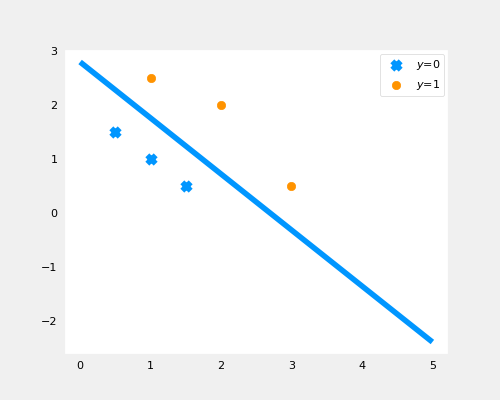

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
print(X_train[i_0, 0], X_train[i_0, 1])
print(X_train[i_1, 0], X_train[i_1, 1])

# points
ax.scatter(X_train[i_0, 0], X_train[i_0, 1], marker='x', label="$y$=0")
ax.scatter(X_train[i_1, 0], X_train[i_1, 1], marker='o', label="$y$=1")

# line
# w1x1 + w0x0 + b = 0
x0 = np.arange(0, 6)
x1 = -(w_out[0] * x0 + b_out) / w_out[1]
ax.plot(x0, x1)

plt.legend()

## another data set

In [95]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

In [96]:
w_tmp = np.zeros_like(x_train[0])
b_tmp = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost -0.6433158133057238   
Iteration 1000: Cost -0.1132929921599034   
Iteration 2000: Cost -0.07793458704949963   
Iteration 3000: Cost -0.0611139750771269   
Iteration 4000: Cost -0.05067060233609751   
Iteration 5000: Cost -0.04339775780412448   
Iteration 6000: Cost -0.03799053561526236   
Iteration 7000: Cost -0.03379355724130196   
Iteration 8000: Cost -0.030433646671395555   
Iteration 9000: Cost -0.0276797908056348   

updated parameters: w:5.119873496232877, b:-12.609503113679205


In [97]:
i_0 = y_train == 0
i_1 = y_train == 1
i_0 = i_0.reshape(-1,)
i_1 = i_1.reshape(-1,)
print(x_train[i_0])
print(x_train[i_1])

[0. 1. 2.]
[3. 4. 5.]


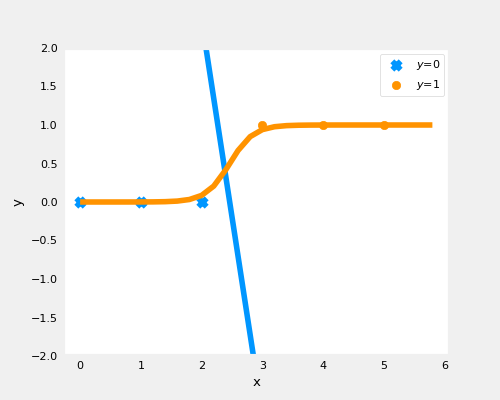

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

# points
ax.scatter(x_train[i_0], y_train[i_0], marker='x', label="$y$=0")
ax.scatter(x_train[i_1], y_train[i_1], marker='o', label="$y$=1")

# line
# w1x1 + w0x0 + b = 0
x0 = np.arange(0, 6, 0.2)
y = -(w_out * x0 + b_out)
ax.plot(x0, y)

f = w_out * x0 + b_out
z = sigmoid(f)
ax.plot(x0, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-2, 2)

plt.legend()